## Loading from Google Drive

In [4]:
# Import the necessary libraries

#libraries for data wrangling
import pandas as pd
import numpy as np

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for time
from datetime import datetime, timedelta

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set up views
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [7]:
# Define the data path
data_path = 'archive.zip'

# Download the file from Google Drive if it does not exist
import os

if not os.path.exists(data_path): # Check if file already exists
	# Install gdown if not already installed
	%pip install gdown
	import gdown
	raw_url = 'https://drive.google.com/file/d/1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X/view?usp=sharing'
	file_id = '1ib1PWK_3oaaSfThqfnfSoPZq7vA1g33X'  # Make sure it's a string
	# Retry download up to 3 times if connection fails
	for attempt in range(3):
		try:
			gdown.download(f"https://drive.google.com/uc?id={file_id}", data_path, quiet=False) # Download the file
			break
		except Exception as e: # Catch any exception
			print(f"Attempt {attempt+1} failed: {e}")	# Print the error message
			if attempt == 2:
				raise

# Load the data into a DataFrame
df = pd.read_csv(data_path, low_memory=True, compression='zip')
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7784659,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.0,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.0,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.0,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"
7784663,12840464,JF411839,09/26/2022 07:20:00 PM,0000X N MASON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,1513,15.0,29.0,25.0,15,1136773.0,1899652.0,2022,01/03/2023 03:46:28 PM,41.880802,-87.773246,"(41.880802263, -87.773245737)"


In [8]:
# Lets write a function to load the full dataset (7M+ records) or just a specified samples.
# The  idea behind this is just to reduce memory usage for the dataset to also load faster.
# Take your time to understand the function, what I did and why I did so.

def load_chicago_crime_data(data_path, sample_size=None):
    """
    Optimized loading function for Chicago crime data
    """
    # Define data types to reduce memory usage
    dtype_dict = {
        'ID': 'Int32',
        'Case Number': 'string',
        'IUCR': 'category',
        'Primary Type': 'category',
        'Description': 'category',
        'Location Description': 'category',
        'Arrest': 'bool',
        'Domestic': 'bool',
        'Beat': 'Int16',
        'District': 'Int8',
        'Ward': 'Int8',
        'Community Area': 'Int8',
        'FBI Code': 'category',
        'X Coordinate': 'float32',
        'Y Coordinate': 'float32',
        'Latitude': 'float32',
        'Longitude': 'float32'
    }

    # Parse dates during loading
    date_cols = ['Date', 'Updated On']

    if sample_size:
        # Load random sample for faster analysis
        df = pd.read_csv(data_path,
                        dtype=dtype_dict,
                        parse_dates=date_cols,
                        low_memory=False, keep_default_na=True, nrows = sample_size) # you can use ".sample(n=sample_size)" as well.
    else:
        df = pd.read_csv(data_path,
                        dtype=dtype_dict,
                        parse_dates=date_cols,
                        low_memory=False, keep_default_na=True)

    return df

# I would load this and comment it out...

In [ ]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
7784659,12847575,JF420478,09/01/2022 05:00:00 AM,005XX W SURF ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1934,19.0,44.0,6.0,26,1172497.0,1919410.0,2022,01/03/2023 03:46:28 PM,41.934305,-87.641485,"(41.934304581, -87.641484982)"
7784660,12847801,JF420319,07/08/2022 12:00:00 AM,114XX S PRAIRIE AVE,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,STREET,False,False,531,5.0,9.0,49.0,11,1179966.0,1828818.0,2022,01/03/2023 03:46:28 PM,41.685544,-87.616813,"(41.685543881, -87.616812541)"
7784661,12847324,JF420102,09/27/2022 11:00:00 AM,023XX E 70TH ST,0810,THEFT,OVER $500,RESIDENCE,False,False,331,3.0,5.0,43.0,06,1193181.0,1859005.0,2022,01/03/2023 03:46:28 PM,41.768068,-87.567453,"(41.768068052, -87.567452932)"
7784662,12847570,JF420427,09/03/2022 10:25:00 AM,052XX W CARMEN AVE,2021,NARCOTICS,POSSESS - BARBITURATES,RESIDENCE - YARD (FRONT / BACK),True,False,1623,16.0,45.0,11.0,18,1140553.0,1933418.0,2022,01/03/2023 03:46:28 PM,41.973391,-87.758535,"(41.973391184, -87.758534512)"
7784663,12840464,JF411839,09/26/2022 07:20:00 PM,0000X N MASON AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,SIDEWALK,True,False,1513,15.0,29.0,25.0,15,1136773.0,1899652.0,2022,01/03/2023 03:46:28 PM,41.880802,-87.773246,"(41.880802263, -87.773245737)"


#### **Preliminary Data Analysis (PDA)**


In [ ]:
# Dataset shape and basic info

print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")



 

=== DATASET OVERVIEW ===
Dataset Shape: (7784664, 22)
Memory Usage: 5302.92 MB


In [ ]:
# Getting the column information
print("\n=== COLUMN INFORMATION ===")
print(f"List of columns:{df.columns}")
print("")
print("Column details:") 
print(df.info())



=== COLUMN INFORMATION ===
List of columns:Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')

Column details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7784664 entries, 0 to 7784663
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  

In [ ]:
# Getting a snapshot of the dataset
print("\n=== FIRST AND LAST 5 RECORDS ===")
print(df.head())
print("")
print(df.tail())




=== FIRST AND LAST 5 RECORDS ===
         ID Case Number                    Date                  Block  IUCR Primary Type              Description Location Description  Arrest  Domestic  Beat  District  Ward  Community Area FBI Code  X Coordinate  Y Coordinate  Year              Updated On   Latitude  Longitude                       Location
0  10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST  0486      BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   False      True   924       9.0  12.0            61.0      08B     1165074.0     1875917.0  2015  02/10/2018 03:50:01 PM  41.815117 -87.670000  (41.815117282, -87.669999562)
1  10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE  0870        THEFT           POCKET-PICKING              CTA BUS   False     False  1511      15.0  29.0            25.0       06     1138875.0     1904869.0  2015  02/10/2018 03:50:01 PM  41.895080 -87.765400  (41.895080471, -87.765400451)
2  11646166    JC213529  09/01

In [ ]:
# Getting Basic Statistics of the dataset
print("\n=== BASIC STATISTICS ===")
print(df.describe(include='all'))


=== BASIC STATISTICS ===
                  ID Case Number                    Date             Block     IUCR Primary Type Description Location Description   Arrest Domestic          Beat      District          Ward  Community Area FBI Code  X Coordinate  Y Coordinate          Year              Updated On      Latitude     Longitude                       Location
count   7.784664e+06     7784660                 7784664           7784664  7784664      7784664     7784664              7774283  7784664  7784664  7.784664e+06  7.784617e+06  7.169816e+06    7.171188e+06  7784664  7.697816e+06  7.697816e+06  7.784664e+06                 7784664  7.697816e+06  7.697816e+06                        7697816
unique           NaN     7784121                 3207478             62845      404           36         544                  215        2        2           NaN           NaN           NaN             NaN       26           NaN           NaN           NaN                    5561           NaN

**Missing Data Analysis**

- Writing function to analyze missing values

```
df.isna() -
df.isnull() -
df.empty -
df.isna().sum() -
df.isna().any() - 
```

In [ ]:

def analyze_missing_data(df):
    import matplotlib.pyplot as plt

    """Analyze missing data patterns"""

    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })

    missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

    print("=== MISSING DATA ANALYSIS ===")
    print(missing_data)

    # Visualize missing data
    plt.figure(figsize=(12, 6))
    if not missing_data.empty:
        plt.bar(missing_data['Column'], missing_data['Missing_Percentage'])
        plt.title('Missing Data by Column')
        plt.xlabel('Columns')
        plt.ylabel('Missing Percentage (%)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No missing data found!")

=== MISSING DATA ANALYSIS ===
                                    Column  Missing_Count  Missing_Percentage Data_Type
Ward                                  Ward         614848            7.898196   float64
Community Area              Community Area         613476            7.880571   float64
Longitude                        Longitude          86848            1.115629   float64
Latitude                          Latitude          86848            1.115629   float64
X Coordinate                  X Coordinate          86848            1.115629   float64
Y Coordinate                  Y Coordinate          86848            1.115629   float64
Location                          Location          86848            1.115629    object
Location Description  Location Description          10381            0.133352    object
District                          District             47            0.000604   float64
Case Number                    Case Number              4            0.000051    object


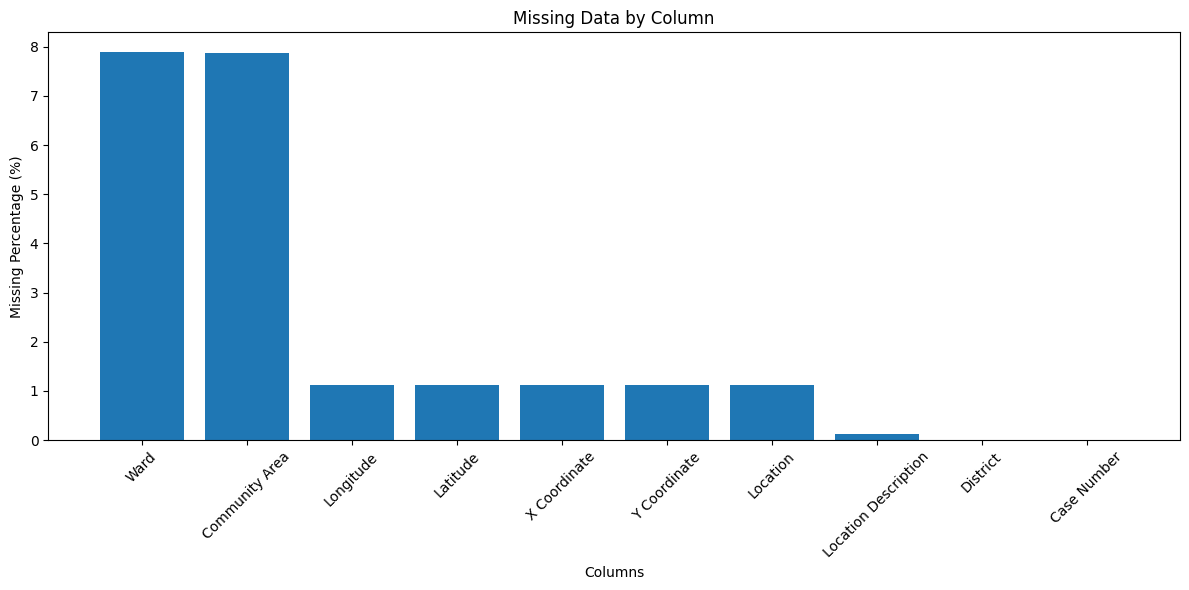

In [ ]:
analyze_missing_data(df)

In [9]:
# Analysing duplicates
def analyze_duplicates(df):
    """Analyze duplicate records in the DataFrame"""
    total_duplicates = df.duplicated().sum()
    print(f"Total duplicate records: {total_duplicates}")

    if total_duplicates > 0:
        duplicate_rows = df[df.duplicated(keep=False)]
        print("\n=== DUPLICATE RECORDS ===")
        print(duplicate_rows)

        # Analyze duplicates by key columns (e.g., 'ID', 'Case Number')
        key_columns = ['ID', 'Case Number']
        for col in key_columns:
            if col in df.columns:
                dup_by_col = df[df.duplicated(subset=[col], keep=False)]
                print(f"\nDuplicates based on '{col}': {len(dup_by_col)} records")
                print(dup_by_col)
    else:
        print("No duplicate records found!")


In [10]:
analyze_duplicates(df)

Total duplicate records: 0
No duplicate records found!


**Crime Distribution Overview**


In [ ]:
df["Primary Type"] #viewing a snapshot of the Primary Type column (Head and Tail)



0                     BATTERY
1                       THEFT
2                       THEFT
3                   NARCOTICS
4                     ASSAULT
                  ...        
7784659         OTHER OFFENSE
7784660    DECEPTIVE PRACTICE
7784661                 THEFT
7784662             NARCOTICS
7784663     WEAPONS VIOLATION
Name: Primary Type, Length: 7784664, dtype: object

In [ ]:
# Crime type distribution
print("=== CRIME TYPE DISTRIBUTION ===")
crime_counts = df['Primary Type'].value_counts()
print(crime_counts)

=== CRIME TYPE DISTRIBUTION ===
Primary Type
THEFT                                1642148
BATTERY                              1422913
CRIMINAL DAMAGE                       887266
NARCOTICS                             747633
ASSAULT                               507296
OTHER OFFENSE                         483642
BURGLARY                              424397
MOTOR VEHICLE THEFT                   375495
DECEPTIVE PRACTICE                    344940
ROBBERY                               292334
CRIMINAL TRESPASS                     214316
WEAPONS VIOLATION                     106418
PROSTITUTION                           69840
OFFENSE INVOLVING CHILDREN             55719
PUBLIC PEACE VIOLATION                 52325
SEX OFFENSE                            30683
CRIM SEXUAL ASSAULT                    27631
INTERFERENCE WITH PUBLIC OFFICER       18392
LIQUOR LAW VIOLATION                   14901
GAMBLING                               14618
ARSON                                  13249
HOMICIDE  

In [ ]:
# Top 10 crime types
print("\n=== TOP 7 CRIME TYPES ===")
top_crimes = crime_counts.head(7)
print(top_crimes)


=== TOP 7 CRIME TYPES ===
Primary Type
THEFT              1642148
BATTERY            1422913
CRIMINAL DAMAGE     887266
NARCOTICS           747633
ASSAULT             507296
OTHER OFFENSE       483642
BURGLARY            424397
Name: count, dtype: int64


## Crime Location Analysis
* There are 215 unique values

In [ ]:
df["Location Description"] # taking a snapshot of the Crime Location

0                                RESIDENCE
1                                  CTA BUS
2                                RESIDENCE
3                                 SIDEWALK
4                                APARTMENT
                        ...               
7784659                          RESIDENCE
7784660                             STREET
7784661                          RESIDENCE
7784662    RESIDENCE - YARD (FRONT / BACK)
7784663                           SIDEWALK
Name: Location Description, Length: 7784664, dtype: object

In [ ]:
# Crime location distribution
print("=== CRIME LOCATION DISTRIBUTION ===")
crime_location = df['Location Description'].value_counts()
print(crime_location)

=== CRIME LOCATION DISTRIBUTION ===
Location Description
STREET                   2026828
RESIDENCE                1305843
APARTMENT                 879342
SIDEWALK                  728865
OTHER                     270026
                          ...   
POOLROOM                       1
TRUCKING TERMINAL              1
LIVERY AUTO                    1
POLICE FACILITY                1
EXPRESSWAY EMBANKMENT          1
Name: count, Length: 215, dtype: int64


In [ ]:
# Top 10 crime location
print("\n=== TOP 7 CRIME LOCATIONS ===")
top_crime_locations = crime_location.head(7)
print(top_crime_locations)


=== TOP 7 CRIME LOCATIONS ===
Location Description
STREET                            2026828
RESIDENCE                         1305843
APARTMENT                          879342
SIDEWALK                           728865
OTHER                              270026
PARKING LOT/GARAGE(NON.RESID.)     202991
ALLEY                              172812
Name: count, dtype: int64


In [ ]:
# Arrest rate analysis
arrest_rate = df['Arrest'].mean() * 100
print(f"\n=== OVERALL ARREST RATE ===")
print(f"Overall Arrest Rate: {arrest_rate:.2f}%")


=== OVERALL ARREST RATE ===
Overall Arrest Rate: 26.14%


In [ ]:
# Domestic violence rate
domestic_rate = df['Domestic'].mean() * 100
print(f"Domestic Violence Rate: {domestic_rate:.2f}%")


Domestic Violence Rate: 13.83%


### **Data Cleaning and Preprocessing**